In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


In [2]:
df = pd.read_excel(r'/Users/anastasiailina/Desktop/jupiter/NKR2RT.xls')
#для mac (r'/Users/anastasiailina/Desktop/jupiter/NKR3RT.xls')
#для huawei (r'C:\NKR_PPMS.xls')

In [3]:
x = np.random.rand(50)*2000


In [4]:
y = np.random.rand(50)*2000

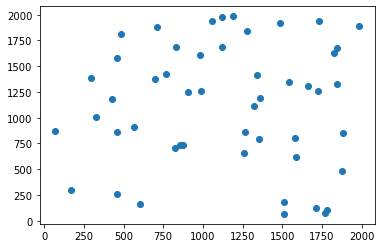

In [5]:
plt.scatter(x,y)

In [6]:
data = df.copy()

cols = ["T", "R", "Deriv"]
data.columns = ["T", "R", "1stDeriv"]
data_ = data.copy()
data_.head()

,T,R,1stDeriv
0,NaN,NaN,NaN
1,4.22015,0.000035,-0.000053
2,4.27394,0.000032,-0.000027
3,4.34702,0.000032,0.000029
4,4.40903,0.000035,-0.000014


In [7]:
T = np.array(data_["T"])
R = np.array(data_["R"])

In [8]:
T = T[~np.isnan(T)]
R = R[~np.isnan(R)]

3117


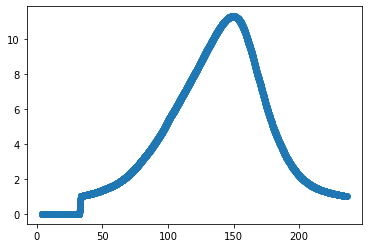

In [9]:
plt.scatter(T,R)
print(len(T))

In [12]:
T_ = np.delete(T, np.s_[0:454])
#T1 = np.delete(T_,np.s_[4703:5622])

In [13]:
print(len(T))

3117


In [14]:
R_ = np.delete(R, np.s_[0:454])
#R1 = np.delete(R_,np.s_[4703:5622])
R2 = R_/0.651

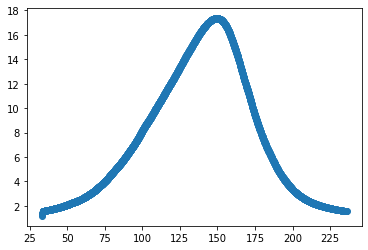

In [15]:
plt.scatter(T_,R2)

In [16]:

def Rmet(t,R0met,X,n):
    return 1/(R0met+X*t**n) 
#initial guess itaration process
#1 (0.892, 2*10**(-5), 2.79, 1.4*10**(-3), 3.05975869e+02, 0.1, 3.06022736e+02)
#2 1.05262645e+00, 2.20311283e-05, 2.74608528e+00, 3.88249973e-04,3.17111298e+02, 1.03494484e-02, 3.17110471e+02
#3 1.05259592e+00, 2.20332982e-05, 2.74606526e+00, 3.88241668e-04, 3.17110768e+02, 1.03455390e-02, 3.17155864e+02
#4 
#5 
#6 

In [17]:
R0met = 0.892
X = 2*10**(-5)
n = 2.79
def Rsemi(t, R0semi,Eg):
    return 1/(R0semi*np.exp(Eg*5.8/t))

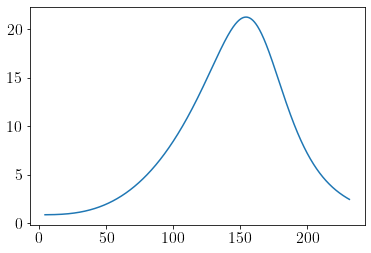

In [239]:
plt.plot(T, 1/(Rsemi(T, 1.4*10**(-3),300)+Rmet(T,R0met,X,n)+Rsemi(T,1*0.1,300)))

In [18]:
def func (x,a,b,c,d,e,f,g):
    return 1/(Rmet(x,a,b,c)+Rsemi(x,d,e)+Rsemi(x,f,g))

In [26]:
initial_guess = [1.05262645e+00, 2.20311283e-05, 2.74608528e+00, 3.88249973e-04,3.17111298e+02, 1.03494484e-02, 3.17110471e+02] 

In [27]:
popt, pcov = curve_fit(func,T_,R2, p0=initial_guess)

print("Optimal parameters:", popt)

Optimal parameters: [1.05259592e+00 2.20332982e-05 2.74606526e+00 3.88241668e-04
 3.17110768e+02 1.03455390e-02 3.17155864e+02]


<ipython-input-17-f77eeb359c12>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(R0semi*np.exp(Eg*5.8/t))
<ipython-input-17-f77eeb359c12>:5: RuntimeWarning: overflow encountered in exp
  return 1/(R0semi*np.exp(Eg*5.8/t))
<ipython-input-17-f77eeb359c12>:5: RuntimeWarning: overflow encountered in true_divide
  return 1/(R0semi*np.exp(Eg*5.8/t))


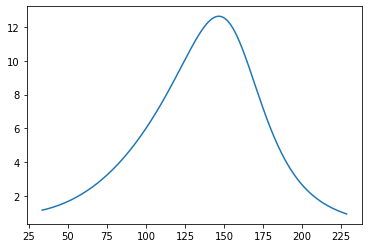

In [37]:
plt.plot(T_,func (T_,8.91844815e-01, 1.98205230e-05, 2.70572811e+00, 4.05039795e-04, 3.05975869e+02, 3.79708942e-01, 3.06022736e+02))

In [38]:
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex', preamble='\\usepackage[russian]{babel}')

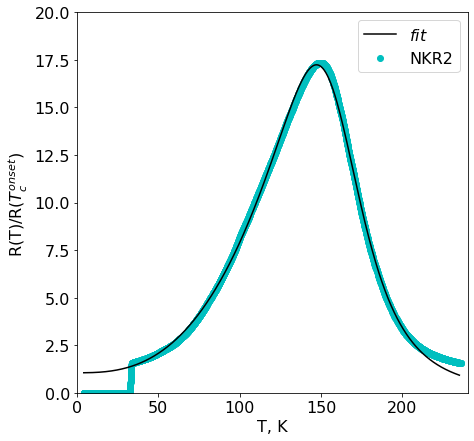

In [28]:
plt.figure(figsize=(7,7))
mpl.rcParams['font.size'] = 16
plt.ylabel("R(T)/R($T_c^{onset}$) ")
plt.xlabel("T, K")
x = np.linspace(4.22, 235,3116)
plt.ylim( 0, 20)
plt.xlim( 0, 240)

plt.scatter(T,R/0.651, color="c", label="NKR2")
plt.plot(x,func(x,1.05259592e+00, 2.20332982e-05, 2.74606526e+00, 3.88241668e-04, 3.17110768e+02, 1.03455390e-02, 3.17155864e+02), 'k', label="$fit$")

save_results_to = '/Users/anastasiailina/Desktop/jupiter/'
plt.legend()
plt.savefig(save_results_to + "NKR2.png", dpi = 300)
plt.legend()
plt.show()